## import the library we need.

In [1]:
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt

# Question 1
## Visit the following website using your mobile phone or another computer other than the one that you are using to do this tutorial: https://www.szynalski.com/tone-generator/
#### Note: Alternatively, you can also find a free tone generator app for your mobile phone. For iOS, you can download “Tone Generator”. It is free. You should not need to pay for the app.
## Play a tone of 1000Hz using either your mobile phone or a second computer (i.e. not the one that you are using to develop and run your program for this tutorial).
## Using a sampling frequency of 44.1kHz, record the tone for 5 second and store the audio recording in a file. Name the file “tone1000Hz.wav”.
## Repeat the above for tones of 2000Hz, 5000Hz, 10000Hz. Name the files “tone2000Hz.wav”, “tone5000Hz.wav” and “tone10000Hz.wav” respectively when you save the recorded audio signals.
* Hint for Question 1:  
import sounddevice

In [2]:
import sounddevice as sd

In [3]:
SAMPLE_RATE  = 44100 #Hz
DURATION = 5 #s

In [4]:
def RecordAndOutputwav(freq=1000):
    recording = sd.rec(frames=SAMPLE_RATE * DURATION, samplerate=SAMPLE_RATE , blocking=True, channels=1)
    wavfile.write('tone' + str(freq) + 'Hz.wav', SAMPLE_RATE , recording)

In [5]:
# frequencies = [1000, 2000, 5000, 10000]
# for frequency in frequencies:
#     RecordAndOutputwav(freq=frequency)

In [6]:
# RecordAndOutputwav(freq=1000)

**Reference:**
* sounddevice: https://blog.csdn.net/qq_20038305/article/details/79077318

# Question 2

## Hint for Question 2: 
## from scipy.fft import fft

In [7]:
from scipy.fft import fft, fftfreq, fftshift

## (i) Read “tone1000Hz.wav”. 

In [42]:
SampleRate, AudioData = wavfile.read('tone1000Hz.wav')

**Reference:**
* read sound files: https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.wavfile.read.html

## (ii) Perform FFT on the audio signal.

In [55]:
AudioDataFFT = fft(AudioData)

## (iii) Plot the absolute value of the FFT results.

In [56]:
# Number of samples in normalized_tone
N = len(AudioDataFFT)
# T = N / SampleRate
# T = np.linspace(0, N / SampleRate, N, endpoint=False)
yf = AudioDataFFT

dt = 1 / SampleRate
xf = fftfreq(N, dt)

N 220500
dt 2.2675736961451248e-05


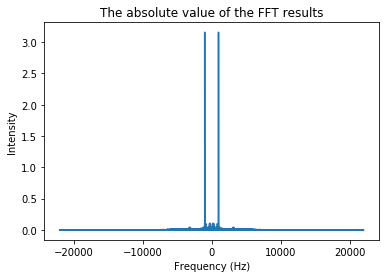

In [53]:
plt.plot(xf, 2 / N * np.abs(yf))
plt.title('The absolute value of the FFT results')
plt.xlabel('Frequency (Hz)')zz
plt.ylabel('Intensity')
plt.show()

**Reference:**
* https://hackmd.io/@yizhewang/HJcTbMoVu
* https://docs.scipy.org/doc/scipy/tutorial/fft.html
* https://realpython.com/python-scipy-fft/

## (iv) Identify the index i.e. location of the two peaks in the FFT results from the figure plotted above.

In [12]:
LeftPeakID = np.argmax(yf[:int(len(yf)/2)])
LeftPeakFreq = xf[LeftPeakID]
RightPeakID = int(len(yf)/2) + np.argmax(yf[int(len(yf)/2):])
RightPeakFreq = xf[RightPeakID]

print('The index of th left peak in the FFT results is', LeftPeakID, 'and its corresponding frequency is', LeftPeakFreq)
print('The index of th right peak in the FFT results is', RightPeakID, 'and its corresponding frequency is', RightPeakFreq)

The index of th left peak in the FFT results is 5000 and its corresponding frequency is 1000.0
The index of th right peak in the FFT results is 215500 and its corresponding frequency is -1000.0


## (v) Compute the frequency resolution.

In [13]:
df = SampleRate / N
print('The frequency resolution is:', df)

The frequency resolution is: 0.2


## (vi) Verify that the peaks happened at the correct frequencies in Hz as expected.

In [14]:
print('With the original FFT results:')
print('The frequency of th left peak in the FFT results is:', LeftPeakFreq)
print('The frequency of th right peak in the FFT results is:', RightPeakFreq)

print('With the frequency resolution:')
LeftPeakFreq = df * LeftPeakID
RightPeakFreq = (df * (-1 * (int(len(yf) / 2) * -1 + RightPeakID - int(len(yf) / 2)))) * -1
print('The frequency of th left peak in the FFT results is:', LeftPeakFreq)
print('The frequency of th right peak in the FFT results is:', RightPeakFreq)

print('With the \'fftshift\' method:')
xf = fftshift(xf)
yf = fftshift(yf)
LeftPeakID = np.argmax(yf[:int(len(yf) / 2)])
LeftPeakFreq = xf[LeftPeakID]
RightPeakID = int(len(yf) / 2) + np.argmax(yf[int(len(yf) /2):])
RightPeakFreq = xf[RightPeakID]
print('The frequency of th left peak in the FFT results is:', LeftPeakFreq)
print('The frequency of th right peak in the FFT results is:', RightPeakFreq)

With the original FFT results:
The frequency of th left peak in the FFT results is: 1000.0
The frequency of th right peak in the FFT results is: -1000.0
With the frequency resolution:
The frequency of th left peak in the FFT results is: 1000.0
The frequency of th right peak in the FFT results is: -1000.0
With the 'fftshift' method:
The frequency of th left peak in the FFT results is: -1000.0
The frequency of th right peak in the FFT results is: 1000.0


We can easily find that all the frequencies computed by different approaches are the same, so we verify that the peaks happened at the correct frequencies in Hz as expected.

## (vii) Repeat (i) to (vi) for the other 3 audio files created in Question 1.

### 2000Hz

#### (i) Read “tone2000Hz.wav”. 

In [15]:
SampleRate, AudioData = wavfile.read('tone2000Hz.wav')

#### (ii) Perform FFT on the audio signal.

In [16]:
AudioDataFFT = fft(AudioData)

#### (iii) Plot the absolute value of the FFT results.

In [17]:
N = len(AudioDataFFT)
yf = AudioDataFFT
dt = 1 / SampleRate
xf = fftfreq(N, dt)

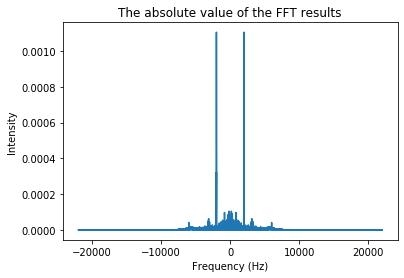

In [18]:
plt.plot(xf, 2 / N * np.abs(yf))
plt.title('The absolute value of the FFT results')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Intensity')
plt.show()

#### (iv) Identify the index i.e. location of the two peaks in the FFT results from the figure plotted above.

In [19]:
LeftPeakID = np.argmax(yf[:int(len(yf)/2)])
LeftPeakFreq = xf[LeftPeakID]
RightPeakID = int(len(yf)/2) + np.argmax(yf[int(len(yf)/2):])
RightPeakFreq = xf[RightPeakID]

print('The index of th left peak in the FFT results is', LeftPeakID, 'and its corresponding frequency is', LeftPeakFreq)
print('The index of th right peak in the FFT results is', RightPeakID, 'and its corresponding frequency is', RightPeakFreq)

The index of th left peak in the FFT results is 10000 and its corresponding frequency is 2000.0
The index of th right peak in the FFT results is 210500 and its corresponding frequency is -2000.0


#### (v) Compute the frequency resolution.

In [20]:
df = SampleRate / N
print('The frequency resolution is:', df)

The frequency resolution is: 0.2


#### (vi) Verify that the peaks happened at the correct frequencies in Hz as expected.

In [21]:
print('With the original FFT results:')
print('The frequency of th left peak in the FFT results is:', LeftPeakFreq)
print('The frequency of th right peak in the FFT results is:', RightPeakFreq)

print('With the frequency resolution:')
LeftPeakFreq = df * LeftPeakID
RightPeakFreq = (df * (-1 * (int(len(yf) / 2) * -1 + RightPeakID - int(len(yf) / 2)))) * -1
print('The frequency of th left peak in the FFT results is:', LeftPeakFreq)
print('The frequency of th right peak in the FFT results is:', RightPeakFreq)

print('With the \'fftshift\' method:')
xf = fftshift(xf)
yf = fftshift(yf)
LeftPeakID = np.argmax(yf[:int(len(yf) / 2)])
LeftPeakFreq = xf[LeftPeakID]
RightPeakID = int(len(yf) / 2) + np.argmax(yf[int(len(yf) / 2):])
RightPeakFreq = xf[RightPeakID]
print('The frequency of th left peak in the FFT results is:', LeftPeakFreq)
print('The frequency of th right peak in the FFT results is:', RightPeakFreq)

With the original FFT results:
The frequency of th left peak in the FFT results is: 2000.0
The frequency of th right peak in the FFT results is: -2000.0
With the frequency resolution:
The frequency of th left peak in the FFT results is: 2000.0
The frequency of th right peak in the FFT results is: -2000.0
With the 'fftshift' method:
The frequency of th left peak in the FFT results is: -2000.0
The frequency of th right peak in the FFT results is: 2000.0


We can easily find that all the frequencies computed by different approaches are the same, so we verify that the peaks happened at the correct frequencies in Hz as expected.

### 5000Hz

#### (i) Read “tone5000Hz.wav”. 

In [22]:
SampleRate, AudioData = wavfile.read('tone5000Hz.wav')

#### (ii) Perform FFT on the audio signal.

In [23]:
AudioDataFFT = fft(AudioData)

#### (iii) Plot the absolute value of the FFT results.

In [24]:
N = len(AudioDataFFT)
yf = AudioDataFFT
dt = 1 / SampleRate
xf = fftfreq(N, dt)

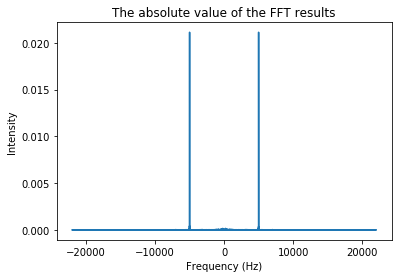

In [25]:
plt.plot(xf, 2 / N * np.abs(yf))
plt.title('The absolute value of the FFT results')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Intensity')
plt.show()

#### (iv) Identify the index i.e. location of the two peaks in the FFT results from the figure plotted above.

In [26]:
LeftPeakID = np.argmax(yf[:int(len(yf)/2)])
LeftPeakFreq = xf[LeftPeakID]
RightPeakID = int(len(yf)/2) + np.argmax(yf[int(len(yf)/2):])
RightPeakFreq = xf[RightPeakID]

print('The index of th left peak in the FFT results is', LeftPeakID, 'and its corresponding frequency is', LeftPeakFreq)
print('The index of th right peak in the FFT results is', RightPeakID, 'and its corresponding frequency is', RightPeakFreq)

The index of th left peak in the FFT results is 25000 and its corresponding frequency is 5000.0
The index of th right peak in the FFT results is 195500 and its corresponding frequency is -5000.0


#### (v) Compute the frequency resolution.

In [27]:
df = SampleRate / N
print('The frequency resolution is:', df)

The frequency resolution is: 0.2


#### (vi) Verify that the peaks happened at the correct frequencies in Hz as expected.

In [28]:
print('With the original FFT results:')
print('The frequency of th left peak in the FFT results is:', LeftPeakFreq)
print('The frequency of th right peak in the FFT results is:', RightPeakFreq)

print('With the frequency resolution:')
LeftPeakFreq = df * LeftPeakID
RightPeakFreq = (df * (-1 * (int(len(yf) / 2) * -1 + RightPeakID - int(len(yf) / 2)))) * -1
print('The frequency of th left peak in the FFT results is:', LeftPeakFreq)
print('The frequency of th right peak in the FFT results is:', RightPeakFreq)

print('With the \'fftshift\' method:')
xf = fftshift(xf)
yf = fftshift(yf)
LeftPeakID = np.argmax(yf[:int(len(yf) / 2)])
LeftPeakFreq = xf[LeftPeakID]
RightPeakID = int(len(yf) / 2) + np.argmax(yf[int(len(yf) / 2):])
RightPeakFreq = xf[RightPeakID]
print('The frequency of th left peak in the FFT results is:', LeftPeakFreq)
print('The frequency of th right peak in the FFT results is:', RightPeakFreq)

With the original FFT results:
The frequency of th left peak in the FFT results is: 5000.0
The frequency of th right peak in the FFT results is: -5000.0
With the frequency resolution:
The frequency of th left peak in the FFT results is: 5000.0
The frequency of th right peak in the FFT results is: -5000.0
With the 'fftshift' method:
The frequency of th left peak in the FFT results is: -5000.0
The frequency of th right peak in the FFT results is: 5000.0


We can easily find that all the frequencies computed by different approaches are the same, so we verify that the peaks happened at the correct frequencies in Hz as expected.

### 10000Hz

#### (i) Read “tone10000Hz.wav”. 

In [29]:
SampleRate, AudioData = wavfile.read('tone10000Hz.wav')

#### (ii) Perform FFT on the audio signal.

In [30]:
AudioDataFFT = fft(AudioData)

#### (iii) Plot the absolute value of the FFT results.

In [31]:
N = len(AudioDataFFT)
yf = AudioDataFFT
dt = 1 / SampleRate
xf = fftfreq(N, dt)

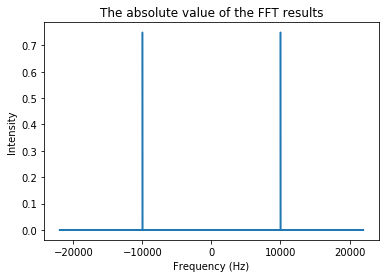

In [32]:
plt.plot(xf, 2 / N * np.abs(yf))
plt.title('The absolute value of the FFT results')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Intensity')
plt.show()

#### (iv) Identify the index i.e. location of the two peaks in the FFT results from the figure plotted above.

In [33]:
LeftPeakID = np.argmax(yf[:int(len(yf)/2)])
LeftPeakFreq = xf[LeftPeakID]
RightPeakID = int(len(yf)/2) + np.argmax(yf[int(len(yf)/2):])
RightPeakFreq = xf[RightPeakID]

print('The index of th left peak in the FFT results is', LeftPeakID, 'and its corresponding frequency is', LeftPeakFreq)
print('The index of th right peak in the FFT results is', RightPeakID, 'and its corresponding frequency is', RightPeakFreq)

The index of th left peak in the FFT results is 50000 and its corresponding frequency is 10000.0
The index of th right peak in the FFT results is 170500 and its corresponding frequency is -10000.0


#### (v) Compute the frequency resolution.

In [34]:
df = SampleRate / N
print('The frequency resolution is:', df)

The frequency resolution is: 0.2


#### (vi) Verify that the peaks happened at the correct frequencies in Hz as expected.

In [35]:
print('With the original FFT results:')
print('The frequency of th left peak in the FFT results is:', LeftPeakFreq)
print('The frequency of th right peak in the FFT results is:', RightPeakFreq)

print('With the frequency resolution:')
LeftPeakFreq = df * LeftPeakID
RightPeakFreq = (df * (-1 * (int(len(yf) / 2) * -1 + RightPeakID - int(len(yf) / 2)))) * -1
print('The frequency of th left peak in the FFT results is:', LeftPeakFreq)
print('The frequency of th right peak in the FFT results is:', RightPeakFreq)

print('With the \'fftshift\' method:')
xf = fftshift(xf)
yf = fftshift(yf)
LeftPeakID = np.argmax(yf[:int(len(yf) / 2)])
LeftPeakFreq = xf[LeftPeakID]
RightPeakID = int(len(yf) / 2) + np.argmax(yf[int(len(yf) / 2):])
RightPeakFreq = xf[RightPeakID]
print('The frequency of th left peak in the FFT results is:', LeftPeakFreq)
print('The frequency of th right peak in the FFT results is:', RightPeakFreq)

With the original FFT results:
The frequency of th left peak in the FFT results is: 10000.0
The frequency of th right peak in the FFT results is: -10000.0
With the frequency resolution:
The frequency of th left peak in the FFT results is: 10000.0
The frequency of th right peak in the FFT results is: -10000.0
With the 'fftshift' method:
The frequency of th left peak in the FFT results is: -10000.0
The frequency of th right peak in the FFT results is: 10000.0


We can easily find that all the frequencies computed by different approaches are the same, so we verify that the peaks happened at the correct frequencies in Hz as expected.